In [ ]:
import pandas as pd

In [ ]:
chipo= pd.read_csv('chipotle.tsv.txt',sep="\t")

In [ ]:
chipo.shape 

(4622, 5)

In [ ]:
chipo.info

<bound method DataFrame.info of       order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                        

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
chipo['order_id']=chipo['order_id'].astype(str)

In [ ]:
chipo.groupby('item_name')['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_quantity= chipo.groupby('item_name')['quantity'].sum()

In [ ]:
item_name_list= item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt= item_quantity.values.tolist()

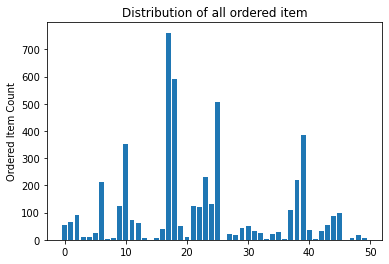

In [ ]:
plt.bar(x_pos, order_cnt, align='center') #align > 정렬방법
plt.ylabel("Ordered Item Count")
plt.title("Distribution of all ordered item")
plt.show()

In [ ]:
chipo['item_price'].apply(
    lambda x: float(x[1:])
)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [ ]:
chipo['item_price']=  chipo['item_price'].apply(
      lambda x: float(x[1:])
  )

In [ ]:
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [ ]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [ ]:
chipo.groupby('order_id').sum()

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [ ]:
chipo_order_id_group= chipo.groupby('order_id').sum()
chipo_order_id_group[chipo_order_id_group['item_price']>=10]

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


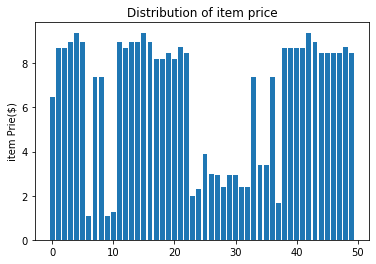

In [ ]:
chipo_singular = chipo[chipo["quantity"]==1]
chipo_singular
price_per_item = chipo_singular.groupby('item_name').min()
price_per_item

%matplotlib inline
item_name_list =  price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price= price_per_item['item_price'].tolist()

plt.bar(x_pos,item_price,align="center")
plt.ylabel('item Prie($)')
plt.title('Distribution of item price')
plt.show()